Let's analyze the results of a Botswana’s 1988 Demographic and Health Survey of 4361 women:


For each of them we know:
 - how many children she gave birth to (ceb)
 - the ideal number of children in her opinion (idlnchld)
 - if she ever was married (evermarr)
 - age at first marriage (agefm)
 - husband's education level in years (heduc)
 - whether she knows about birth control methods (knowmeth)
 - whether she uses birth control methods (usemeth)
 - whether she lives in a city (urban)
 - whether she has access to electricity, radio, tv, and bicycle (electric, radio, tv, bicycle)
 - age (age)
 - education level in years (educ)
 - religious affiliation (religion)

### Task#1

Let's learn to estimate the number of children from other features. Load and study the dataset. How many different values does religion feature have?

In [1]:
import numpy as np
import pandas as pd
import scipy as sc
import itertools

from statsmodels.stats.descriptivestats import sign_test
from statsmodels.stats.weightstats import zconfint
from statsmodels.sandbox.stats.multicomp import multipletests 

%pylab inline


df = pd.read_csv('botswana.txt', sep='\t')
len(df.religion.unique())

Populating the interactive namespace from numpy and matplotlib


4

### Task#2

Many rows have missing features. How many of them would be left if we exclude all containing NaNs?

In [2]:
df_without_nan = df.dropna()
len(df_without_nan)

1834

### Task#3

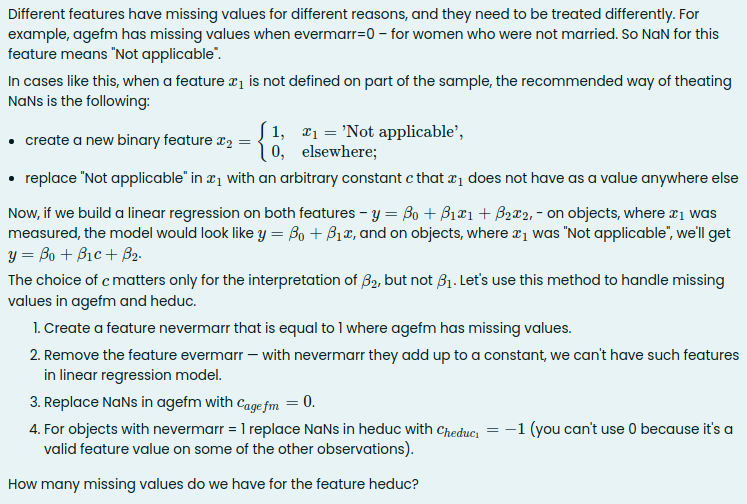

**The correct answer is: 123**

In [3]:
# df.nevermarr = 0
# df.nevermarr *= df.agefm
# df.nevermarr = df.nevermarr.replace(np.nan, 1)
# df = df.drop(['evermarr'], axis=1)
# df.agefm = df.agefm.replace(np.nan, 0)

### Task#4

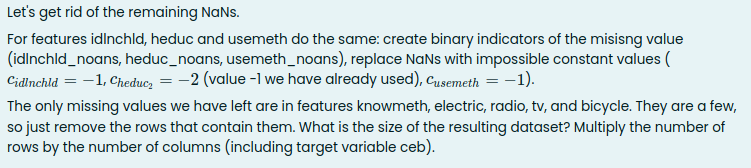

**The correct answer is: 78264**

### Task#5

Regress the number of children ceb on all features using smf.ols like in the example notebook. What R2 do you get? Round the answer to three decimal points.

**The correct answer is: 0.644**

### Task#6

Notice that religion feature is representetd by several dummy variables in the model. How many of them are there?

**The correct answer is: 3**

### Task#7

Use Breusch-Pagan test to check for homoscedasticity; does it hold? If it doesn't and there's heteroscedasticity, refit the model using White's correction of type 1.

**Answers: The error is heteroscedastic, p≤0.05, we have to use White's correction**

### Task#8

Remove from the model unimportant features religion, radio and tv (their coefficients are not significantly different from 0). Check for homoscedasticity, use White's correction if necessary. Has the model become significantly worse? Test with Fisher's test. What p-value do you get? Round to 4 decimal points. If the p-value is small, bring back the removed features; if not, keep the model without religion, tv, and radio.

**The correct answer is: 0.4672**

### Task#9

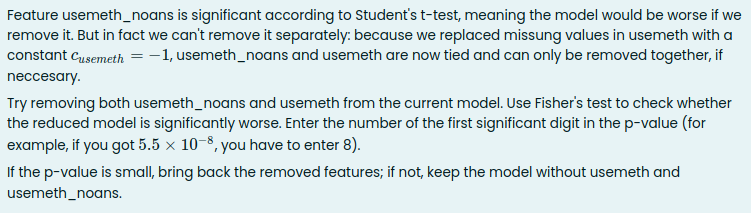

**The correct answer is: 40**

### Task#10

Look at confidence intervals for coefficients (do not forget to use White's correction if the model is heteroscedastic) and select correct conclusions from the following list.

**Answers:**

- A ten year increase in women's age is associated with the increase in average number of children on 1.7 (p<0.001, 95% доверительный интервал — [1.6, 1.8])
- Women who do not know what ideal number of children is have on average βidlnchld_noans+cidlnchldβidlnchld≈0.58 more children
- Women who never married have on average 2.3 children less (p<0.001, 95% confidence interval for the difference – [-2.6, -1.9])